In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import warnings
warnings.filterwarnings('ignore')   
import seaborn as sns
import yfinance as yf
sns.set()

In [2]:
tickers=['^NSEBANK','^NSEI']
data = pd.DataFrame()
for ticker in tickers:
    data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3532 entries, 2010-01-04 to 2025-07-04
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ^NSEBANK  3532 non-null   float64
 1   ^NSEI     3530 non-null   float64
dtypes: float64(2)
memory usage: 82.8 KB


In [4]:
data.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [5]:
data.isna().sum()

^NSEBANK    0
^NSEI       2
dtype: int64

In [6]:
## Dropping Null Values
data.dropna(inplace=True)

In [7]:
data.isna().sum()

^NSEBANK    0
^NSEI       0
dtype: int64

In [8]:
df=data.copy()

In [9]:
df.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [10]:
df=df.asfreq('B')

In [11]:
df.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [12]:
df.isna().sum()

^NSEBANK    515
^NSEI       515
dtype: int64

In [13]:
df.fillna(method='ffill',inplace=True)

In [14]:
df.isna().sum()

^NSEBANK    0
^NSEI       0
dtype: int64

In [15]:
## Simplyfying the Datasets
df['Market_value']=df['^NSEBANK']

In [16]:
df.head()

,^NSEBANK,^NSEI,Market_value
Date,,,
2010-01-04,9112.244141,5232.200195,9112.244141
2010-01-05,9192.043945,5277.899902,9192.043945
2010-01-06,9222.892578,5281.799805,9222.892578
2010-01-07,9192.843750,5263.100098,9192.843750
2010-01-08,9160.593750,5244.750000,9160.593750


In [17]:
## Deleting Extra Columns 
del df['^NSEBANK'],df['^NSEI']

In [18]:
df.head()

,Market_value
Date,
2010-01-04,9112.244141
2010-01-05,9192.043945
2010-01-06,9222.892578
2010-01-07,9192.843750
2010-01-08,9160.593750


In [19]:
df.describe()

,Market_value
count,4045.000000
mean,25076.327577
std,13321.497160
min,7798.458984
25%,12424.555664
50%,22264.642578
75%,35123.988281
max,57459.449219


In [20]:
## Spliting the Date
size=int(len(df)*0.8)
train=df.iloc[:size]
test=df.iloc[size:]

In [21]:
train.tail()

,Market_value
Date,
2022-05-24,34289.750000
2022-05-25,34339.101562
2022-05-26,35094.492188
2022-05-27,35612.886719
2022-05-30,35826.531250


In [22]:
test.head()

,Market_value
Date,
2022-05-31,35486.984375
2022-06-01,35620.386719
2022-06-02,35613.234375
2022-06-03,35274.640625
2022-06-06,35309.789062


## ploting ACF anf PACF plots

Text(0.5, 1.0, 'ACF Bank Nifty')

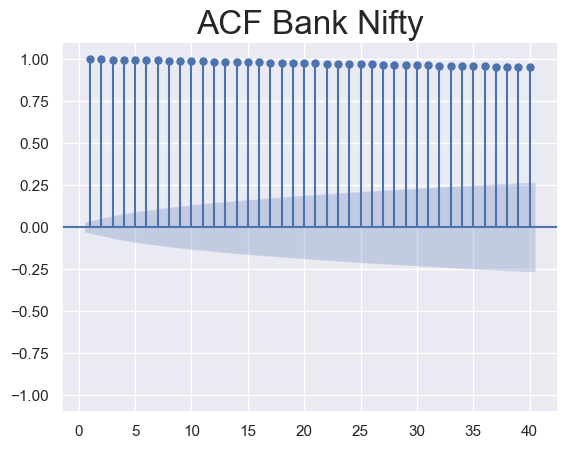

In [23]:
## ACF
sgt.plot_acf(df.Market_value,lags=40,zero=False)
plt.ylim(-1.1,1.1)
plt.title("ACF Bank Nifty",size=24)

Text(0.5, 1.0, 'PACF Bank Nifty')

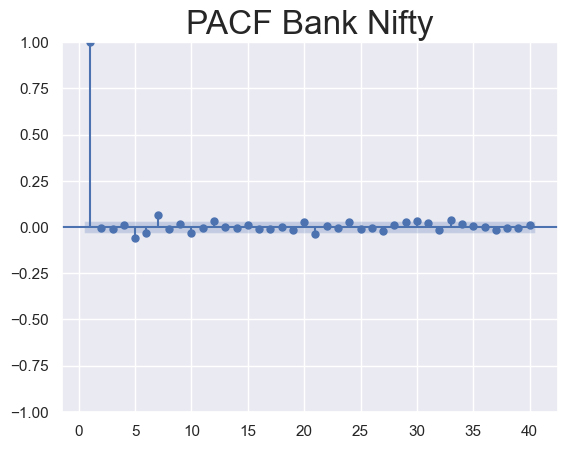

In [24]:
## Pacf 
sgt.plot_pacf(df.Market_value,lags=40,zero=False,method=('ols'))
plt.title("PACF Bank Nifty",size=24)

In [25]:
## Defining LLR Test for Easy Comparison
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Multiple MA models for many Lags and comparing them (for Prices)


In [26]:
model_ma1 = ARIMA(df.Market_value, order=(0,0,1))
result_ma1=model_ma1.fit()
result_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -41428.903
Date:                Sun, 07 Sep 2025   AIC                          82863.806
Time:                        15:02:26   BIC                          82882.722
Sample:                    01-04-2010   HQIC                         82870.507
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    211.466    118.585      0.000    2.47e+04    2.55e+04
ma.L1          0.9814      0.003    351.730      0.000       0.976       0.987
sigma2      4.605e+07      0.019   2.41e+09      0.000    4.61e+07    4.61e+07
===================================================================================
Ljung-Box (L1) (Q):                3755.23   Jarque-Bera (JB):               346.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                             0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.02e+23. Standard errors may be unstable.
"""

In [27]:
model_ma2 = ARIMA(df.Market_value, order=(0,0,2))
result_ma2=model_ma2.fit()
result_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -39089.277
Date:                Sun, 07 Sep 2025   AIC                          78186.555
Time:                        15:02:29   BIC                          78211.776
Sample:                    01-04-2010   HQIC                         78195.490
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    219.515    114.236      0.000    2.46e+04    2.55e+04
ma.L1          1.7472      0.005    338.558      0.000       1.737       1.757
ma.L2          0.9155      0.005    178.910      0.000       0.905       0.926
sigma2      1.448e+07      0.070   2.07e+08      0.000    1.45e+07    1.45e+07
===================================================================================
Ljung-Box (L1) (Q):                2830.95   Jarque-Bera (JB):               336.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.85   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.8e+22. Standard errors may be unstable.
"""

In [28]:
model_ma3 = ARIMA(df.Market_value, order=(0,0,3))
result_ma3=model_ma3.fit()
result_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -38510.645
Date:                Sun, 07 Sep 2025   AIC                          77031.291
Time:                        15:02:33   BIC                          77062.817
Sample:                    01-04-2010   HQIC                         77042.459
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    347.885     72.083      0.000    2.44e+04    2.58e+04
ma.L1          2.2127      0.011    199.911      0.000       2.191       2.234
ma.L2          2.1983      0.025     86.448      0.000       2.148       2.248
ma.L3          0.9463      0.015     61.109      0.000       0.916       0.977
sigma2      1.083e+07      0.234   4.62e+07      0.000    1.08e+07    1.08e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):               481.59
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               3.60   Skew:                             0.84
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.78e+22. Standard errors may be unstable.
"""

In [29]:
model_ma4 = ARIMA(df.Market_value, order=(0,0,4))
result_ma4=model_ma4.fit()
result_ma4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 4)   Log Likelihood              -35863.363
Date:                Sun, 07 Sep 2025   AIC                          71738.727
Time:                        15:02:37   BIC                          71776.558
Sample:                    01-04-2010   HQIC                         71752.129
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    246.693    101.650      0.000    2.46e+04    2.56e+04
ma.L1          2.3731      0.007    324.798      0.000       2.359       2.387
ma.L2          2.9250      0.015    195.039      0.000       2.896       2.954
ma.L3          2.0795      0.015    137.448      0.000       2.050       2.109
ma.L4          0.7309      0.008     95.495      0.000       0.716       0.746
sigma2      2.935e+06      0.508   5.78e+06      0.000    2.94e+06    2.94e+06
===================================================================================
Ljung-Box (L1) (Q):                1151.44   Jarque-Bera (JB):               733.15
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.22   Skew:                             0.86
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.77e+21. Standard errors may be unstable.
"""

In [30]:
model_ma5 = ARIMA(df.Market_value, order=(0,0,5))
result_ma5=model_ma5.fit()
result_ma5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -40696.337
Date:                Sun, 07 Sep 2025   AIC                          81406.674
Time:                        15:02:40   BIC                          81450.811
Sample:                    01-04-2010   HQIC                         81422.311
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04   3.82e-07   6.56e+10      0.000    2.51e+04    2.51e+04
ma.L1          2.2606      0.022    101.055      0.000       2.217       2.304
ma.L2          2.8170      0.045     62.580      0.000       2.729       2.905
ma.L3          2.8088      0.037     76.274      0.000       2.737       2.881
ma.L4          2.2472      0.043     52.332      0.000       2.163       2.331
ma.L5          0.9941      0.029     34.508      0.000       0.938       1.051
sigma2      3.374e+07   6.76e-09   4.99e+15      0.000    3.37e+07    3.37e+07
===================================================================================
Ljung-Box (L1) (Q):                3007.94   Jarque-Bera (JB):               104.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              10.82   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.94e+30. Standard errors may be unstable.
"""

In [31]:
model_ma6 = ARIMA(df.Market_value, order=(0,0,6))
result_ma6=model_ma6.fit()
result_ma6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -34044.450
Date:                Sun, 07 Sep 2025   AIC                          68104.900
Time:                        15:02:48   BIC                          68155.342
Sample:                    01-04-2010   HQIC                         68122.770
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    316.166     79.314      0.000    2.45e+04    2.57e+04
ma.L1          2.4245      0.010    237.631      0.000       2.405       2.445
ma.L2          3.6539      0.025    146.986      0.000       3.605       3.703
ma.L3          3.9182      0.036    108.591      0.000       3.847       3.989
ma.L4          3.0931      0.036     85.361      0.000       3.022       3.164
ma.L5          1.7135      0.025     68.518      0.000       1.665       1.763
ma.L6          0.5342      0.011     50.663      0.000       0.513       0.555
sigma2      1.194e+06   2.19e+04     54.584      0.000    1.15e+06    1.24e+06
===================================================================================
Ljung-Box (L1) (Q):                 374.66   Jarque-Bera (JB):              3285.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.67   Skew:                             1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
model_ma7 = ARIMA(df.Market_value, order=(0,0,7))
result_ma7=model_ma7.fit()
result_ma7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 7)   Log Likelihood              -41676.973
Date:                Sun, 07 Sep 2025   AIC                          83371.946
Time:                        15:02:53   BIC                          83428.693
Sample:                    01-04-2010   HQIC                         83392.050
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04   2065.766     12.139      0.000     2.1e+04    2.91e+04
ma.L1          0.8017      0.215      3.727      0.000       0.380       1.223
ma.L2          0.4253      0.189      2.256      0.024       0.056       0.795
ma.L3          0.7452      0.195      3.828      0.000       0.364       1.127
ma.L4          0.1797      0.175      1.027      0.304      -0.163       0.523
ma.L5          0.5676      0.199      2.855      0.004       0.178       0.957
ma.L6          0.8558      0.188      4.551      0.000       0.487       1.224
ma.L7          0.3458      0.220      1.571      0.116      -0.086       0.777
sigma2      1.117e+08      0.407   2.74e+08      0.000    1.12e+08    1.12e+08
===================================================================================
Ljung-Box (L1) (Q):                 477.27   Jarque-Bera (JB):               446.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.95   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.35e+24. Standard errors may be unstable.
"""

In [33]:
model_ma8 = ARIMA(df.Market_value, order=(0,0,8))
result_ma8=model_ma8.fit()
result_ma8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 4045
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -35031.508
Date:                Sun, 07 Sep 2025   AIC                          70083.016
Time:                        15:03:07   BIC                          70146.068
Sample:                    01-04-2010   HQIC                         70105.354
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.508e+04    273.531     91.676      0.000    2.45e+04    2.56e+04
ma.L1          1.7128      0.006    290.318      0.000       1.701       1.724
ma.L2          1.7539      0.009    200.973      0.000       1.737       1.771
ma.L3          1.5000      0.006    264.625      0.000       1.489       1.511
ma.L4          1.2483      0.005    235.180      0.000       1.238       1.259
ma.L5          1.5510      0.005    292.789      0.000       1.541       1.561
ma.L6          1.8038      0.006    315.312      0.000       1.793       1.815
ma.L7          1.6305      0.009    184.988      0.000       1.613       1.648
ma.L8          0.8636      0.006    145.059      0.000       0.852       0.875
sigma2      1.746e+06      0.998   1.75e+06      0.000    1.75e+06    1.75e+06
===================================================================================
Ljung-Box (L1) (Q):                1002.78   Jarque-Bera (JB):               830.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.07e+20. Standard errors may be unstable.
"""

We stopped here only because p>z value is way more than our significance value so we will use ar6 or ar8 model I  didnt stopped on ar7 model because I wanted to see can next model will be better than the previous one and it is So now we will compare which is better MA6 or MA8

## Performing LLR Test on All three model

In [34]:
LLR_test(model_ma1,model_ma2)

np.float64(0.0)

In [35]:
LLR_test(model_ma2,model_ma3)

np.float64(0.0)

In [36]:
LLR_test(model_ma3,model_ma4)

np.float64(0.0)

In [37]:
LLR_test(model_ma4,model_ma5)

np.float64(1.0)

In [38]:
LLR_test(model_ma5,model_ma6)

np.float64(0.0)

In [39]:
LLR_test(model_ma6,model_ma7)

np.float64(1.0)

In [40]:
LLR_test(model_ma7,model_ma8)

np.float64(0.0)

In [41]:
## Comparing model 6 and 8
LLR_test(model_ma6,model_ma8,DF=2) # Here model 6 is better

np.float64(1.0)

In [42]:
## Comparing model 4 and 6
LLR_test(model_ma4,model_ma6,DF=2) # Here model 6 is better

np.float64(0.0)

Here The best model we can find is model 6 so we will use this model

## Analysing the residuals

In [43]:
df['res_price']=result_ma6.resid

In [44]:
## Residual Mean
df.res_price.mean()

np.float64(-2.3245361719766287)

In [47]:
## Residual Variance
df.res_price.var()

1257982.8137064213

In [48]:
## Dicky Fuller Test
sts.adfuller(df.res_price)

(np.float64(0.3382895870831705),
 np.float64(0.9790345809361245),
 12,
 4032,
 {'1%': np.float64(-3.4319728839485406),
  '5%': np.float64(-2.8622571013298965),
  '10%': np.float64(-2.5671517204059)},
 np.float64(58223.17081905611))

Text(0.5, 1.0, 'ACF of Residuals FOR Price')

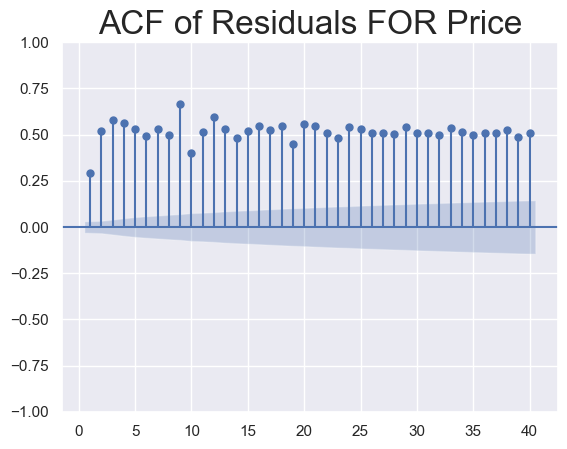

In [51]:
## Ploting ACF for Residuals
sgt.plot_acf(df.res_price,lags=40,zero=False)
plt.ylim(-1,1)
plt.title("ACF of Residuals FOR Price",size=24)

Text(0.5, 1.0, 'PACF of Residuals FOR Price')

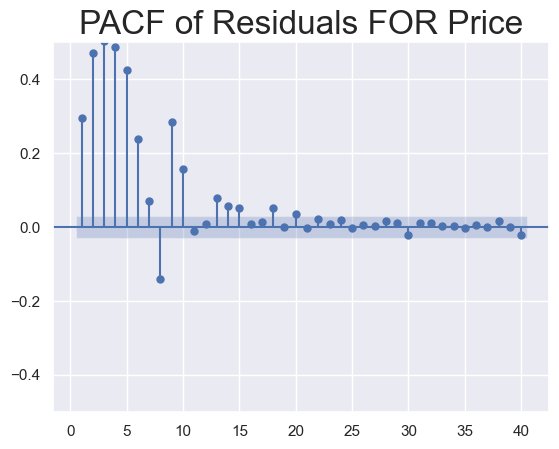

In [54]:
## Ploting PACF for Residuals
sgt.plot_pacf(df.res_price,lags=40,zero=False)
plt.ylim(-0.5,0.5)
plt.title("PACF of Residuals FOR Price",size=24)

## Now calculating The same Things for returns

In [55]:
## Adding Returns to the dataframe
df['returns']=df.Market_value.pct_change(1)*100
df=df.iloc[1:]
df.head()

,Market_value,res_price,returns
Date,,,
2010-01-05,9192.043945,-1384.039722,0.875743
2010-01-06,9222.892578,-2711.620391,0.335601
2010-01-07,9192.843750,-808.157686,-0.325807
2010-01-08,9160.593750,-980.432210,-0.350816
2010-01-11,9173.443359,-1206.800472,0.140270


In [56]:
## Running Dicky Fuller test for Returns
sts.adfuller(df.returns)

(np.float64(-18.80836817762138),
 np.float64(2.0225345071007116e-30),
 10,
 4033,
 {'1%': np.float64(-3.4319724812908037),
  '5%': np.float64(-2.862256923456619),
  '10%': np.float64(-2.5671516257138216)},
 np.float64(14297.720920268723))

## Ploting PACF and ACF for Returns

(-0.1, 0.1)

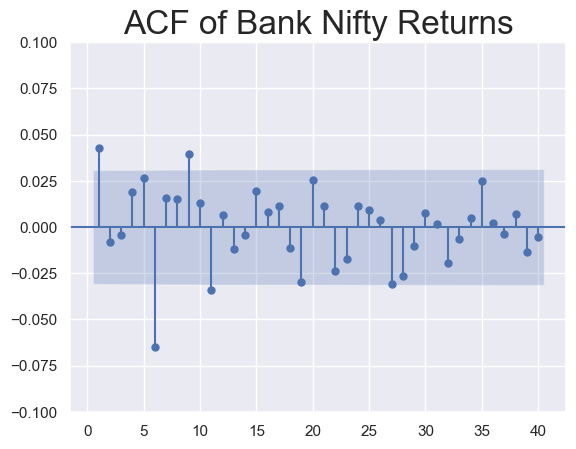

In [57]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title("ACF of Bank Nifty Returns",size=24)
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

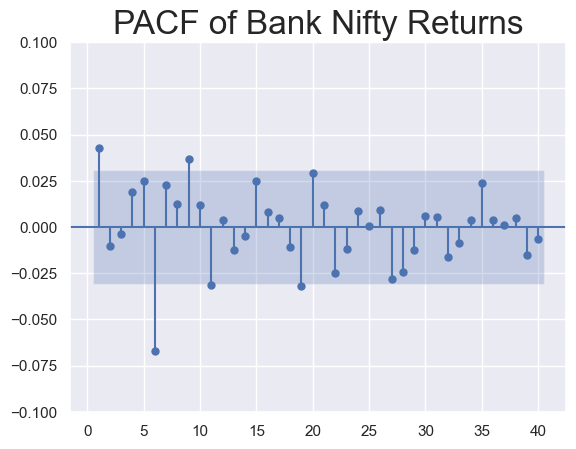

In [58]:
sgt.plot_pacf(df.returns,lags=40,zero=False)
plt.title("PACF of Bank Nifty Returns",size=24)
plt.ylim(-0.1,0.1)

## MA Models for Returns

In [60]:
model_ret_MA=ARIMA(df.returns, order=(0,0,1))
results_ret_MA = model_ret_MA.fit()
results_ret_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4044
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7214.698
Date:                Sun, 07 Sep 2025   AIC                          14435.395
Time:                        15:08:54   BIC                          14454.310
Sample:                    01-05-2010   HQIC                         14442.096
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0558      0.024      2.354      0.019       0.009       0.102
ma.L1          0.0437      0.011      3.915      0.000       0.022       0.066
sigma2         2.0755      0.015    140.605      0.000       2.047       2.104
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52646.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
model_ret_MA2=ARIMA(df.returns, order=(0,0,2))
results_ret_MA2 = model_ret_MA2.fit()
results_ret_MA2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4044
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7214.578
Date:                Sun, 07 Sep 2025   AIC                          14437.156
Time:                        15:09:09   BIC                          14462.376
Sample:                    01-05-2010   HQIC                         14446.091
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0558      0.024      2.340      0.019       0.009       0.102
ma.L1          0.0432      0.011      3.788      0.000       0.021       0.066
ma.L2         -0.0076      0.009     -0.857      0.392      -0.025       0.010
sigma2         2.0754      0.015    140.618      0.000       2.046       2.104
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52636.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
model_ret_MA3=ARIMA(df.returns, order=(0,0,3))
results_ret_MA3 = model_ret_MA3.fit()
results_ret_MA3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4044
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7214.508
Date:                Sun, 07 Sep 2025   AIC                          14439.017
Time:                        15:09:30   BIC                          14470.541
Sample:                    01-05-2010   HQIC                         14450.185
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0558      0.024      2.319      0.020       0.009       0.103
ma.L1          0.0435      0.012      3.779      0.000       0.021       0.066
ma.L2         -0.0074      0.009     -0.836      0.403      -0.025       0.010
ma.L3         -0.0063      0.010     -0.651      0.515      -0.025       0.013
sigma2         2.0753      0.015    138.031      0.000       2.046       2.105
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52858.65
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We stopped here only because p>z value is way more than our significance value so we will use MA1 model I  didnt stopped on MA2 model because I wanted to see can next model will be better than the previous one

## Performing LLR Test on Returns Value

In [63]:
LLR_test(model_ret_MA,model_ret_MA2)

np.float64(0.625)

In [64]:
LLR_test(model_ret_MA2,model_ret_MA3)

np.float64(0.708)

As this both values are more than our significance value of 5% so we will use MA1 model

## Normalising the values

In [65]:
## Setting some benchmarks
benchmark=df.Market_value.iloc[0]
df['norm']=df.Market_value/benchmark*100

In [66]:
df.head()

,Market_value,res_price,returns,norm
Date,,,,
2010-01-05,9192.043945,-1384.039722,0.875743,100.000000
2010-01-06,9222.892578,-2711.620391,0.335601,100.335601
2010-01-07,9192.843750,-808.157686,-0.325807,100.008701
2010-01-08,9160.593750,-980.432210,-0.350816,99.657854
2010-01-11,9173.443359,-1206.800472,0.140270,99.797645


In [67]:
## Dickey Fuller Test for normalisation
sts.adfuller(df.norm)

(np.float64(0.4248716742377633),
 np.float64(0.9824016001639017),
 6,
 4037,
 {'1%': np.float64(-3.4319708726559632),
  '5%': np.float64(-2.8622562128450464),
  '10%': np.float64(-2.5671512474148432)},
 np.float64(21929.60527369529))

In [68]:
## Getting normalised Returns
Bench_ret=df.returns.iloc[0]
df['norm_ret']=df.returns/Bench_ret*100
sts.adfuller(df.norm_ret)

(np.float64(-18.808368177621382),
 np.float64(2.0225345071007116e-30),
 10,
 4033,
 {'1%': np.float64(-3.4319724812908037),
  '5%': np.float64(-2.862256923456619),
  '10%': np.float64(-2.5671516257138216)},
 np.float64(52314.2553272455))

In [69]:
df.head()

,Market_value,res_price,returns,norm,norm_ret
Date,,,,,
2010-01-05,9192.043945,-1384.039722,0.875743,100.000000,100.000000
2010-01-06,9222.892578,-2711.620391,0.335601,100.335601,38.321928
2010-01-07,9192.843750,-808.157686,-0.325807,100.008701,-37.203509
2010-01-08,9160.593750,-980.432210,-0.350816,99.657854,-40.059300
2010-01-11,9173.443359,-1206.800472,0.140270,99.797645,16.017319


## Normalised Returns

In [70]:
model_norm_ret_ma=ARIMA(df.norm_ret, order=(0,0,1))
results_norm_ret_ma = model_norm_ret_ma.fit()
results_norm_ret_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 4044
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -26374.577
Date:                Sun, 07 Sep 2025   AIC                          52755.154
Time:                        15:10:47   BIC                          52774.069
Sample:                    01-05-2010   HQIC                         52761.855
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3660      2.707      2.352      0.019       1.061      11.671
ma.L1          0.0437      0.011      3.911      0.000       0.022       0.066
sigma2      2.709e+04    192.813    140.482      0.000    2.67e+04    2.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52646.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
model_norm_ret_ma2=ARIMA(df.norm_ret, order=(0,0,2))
results_norm_ret_ma2 = model_norm_ret_ma2.fit()
results_norm_ret_ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 4044
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -26374.458
Date:                Sun, 07 Sep 2025   AIC                          52756.917
Time:                        15:11:01   BIC                          52782.137
Sample:                    01-05-2010   HQIC                         52765.852
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3660      2.724      2.337      0.019       1.027      11.705
ma.L1          0.0432      0.011      3.783      0.000       0.021       0.066
ma.L2         -0.0076      0.009     -0.856      0.392      -0.025       0.010
sigma2       2.71e+04    192.960    140.431      0.000    2.67e+04    2.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52636.29
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
model_norm_ret_ma3=ARIMA(df.norm_ret, order=(0,0,3))
results_norm_ret_ma3 = model_norm_ret_ma3.fit()
results_norm_ret_ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 4044
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -26374.389
Date:                Sun, 07 Sep 2025   AIC                          52758.779
Time:                        15:11:14   BIC                          52790.304
Sample:                    01-05-2010   HQIC                         52769.947
                         - 07-04-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3660      2.750      2.315      0.021       0.976      11.756
ma.L1          0.0435      0.012      3.773      0.000       0.021       0.066
ma.L2         -0.0074      0.009     -0.835      0.404      -0.025       0.010
ma.L3         -0.0063      0.010     -0.650      0.516      -0.025       0.013
sigma2       2.71e+04    196.670    137.812      0.000    2.67e+04    2.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             52858.86
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Same Reasons as for Returns

## Analysing The Residuals

In [73]:
## Adding the column of residual returns 
df['res_ret']=results_ret_MA.resid

In [74]:
## Calculating mean of residual returns 
df.res_ret.mean()

np.float64(-1.3006479443338518e-06)

In [75]:
## Calculating mean of residual variance
df.res_ret.var()

2.076055347393105

In [76]:
## Dicky Fuller Test of Residual Returns
sts.adfuller(df.res_ret)

(np.float64(-18.85312688021123),
 0.0,
 10,
 4033,
 {'1%': np.float64(-3.4319724812908037),
  '5%': np.float64(-2.862256923456619),
  '10%': np.float64(-2.5671516257138216)},
 np.float64(14297.677437136244))

Text(0.5, 1.0, 'ACF of Residuals FOR Returns')

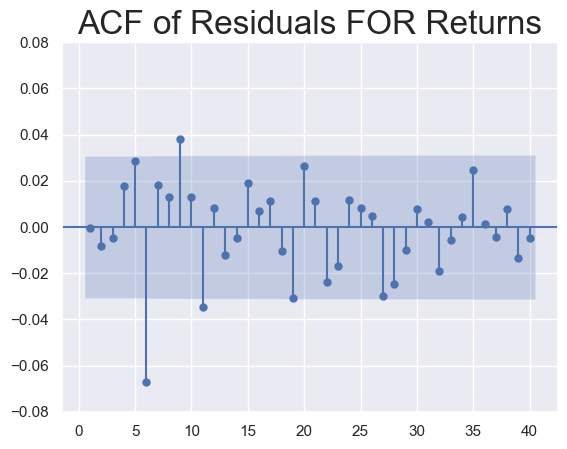

In [77]:
## Ploting ACF of Residual Returns
sgt.plot_acf(df.res_ret,lags=40,zero=False)
plt.ylim(-0.08,0.08)
plt.title("ACF of Residuals FOR Returns",size=24)

Text(0.5, 1.0, 'Residual of Returns')

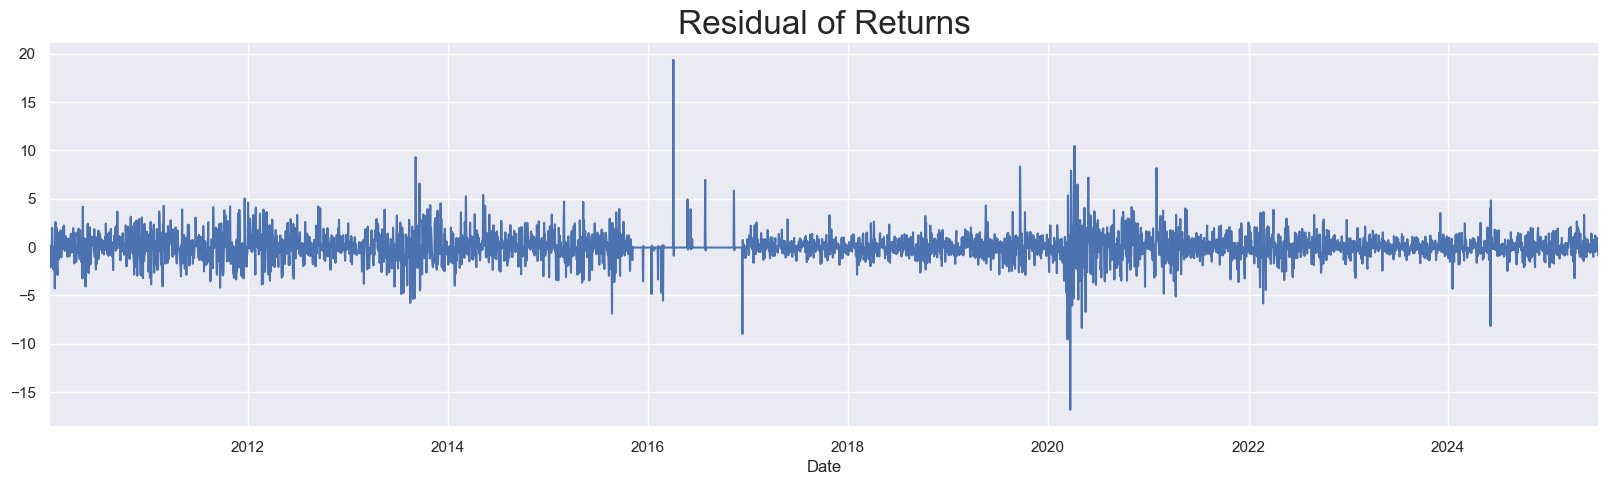

In [78]:
## Ploting Residual Returns
df.res_ret[1:].plot(figsize=(20,5))
plt.title("Residual of Returns",size=24)